In [8]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import copy as cy
from sklearn.preprocessing import LabelEncoder


In [9]:
read = pd.read_csv("electricity-normalized.csv", delimiter=",")
read.head()

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class
0,0.0,2,0.000000,0.056443,0.439155,0.003467,0.422915,0.414912,UP
1,0.0,2,0.021277,0.051699,0.415055,0.003467,0.422915,0.414912,UP
2,0.0,2,0.042553,0.051489,0.385004,0.003467,0.422915,0.414912,UP
3,0.0,2,0.063830,0.045485,0.314639,0.003467,0.422915,0.414912,UP
4,0.0,2,0.085106,0.042482,0.251116,0.003467,0.422915,0.414912,DOWN


In [10]:
read.shape

(45312, 9)

In [11]:
read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45312 entries, 0 to 45311
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       45312 non-null  float64
 1   day        45312 non-null  int64  
 2   period     45312 non-null  float64
 3   nswprice   45312 non-null  float64
 4   nswdemand  45312 non-null  float64
 5   vicprice   45312 non-null  float64
 6   vicdemand  45312 non-null  float64
 7   transfer   45312 non-null  float64
 8   class      45312 non-null  object 
dtypes: float64(7), int64(1), object(1)
memory usage: 3.1+ MB


In [15]:
labelEnc = LabelEncoder()
read['class'] = labelEnc.fit_transform(read['class'])

read.head()


,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class
0,0.0,2,0.000000,0.056443,0.439155,0.003467,0.422915,0.414912,1
1,0.0,2,0.021277,0.051699,0.415055,0.003467,0.422915,0.414912,1
2,0.0,2,0.042553,0.051489,0.385004,0.003467,0.422915,0.414912,1
3,0.0,2,0.063830,0.045485,0.314639,0.003467,0.422915,0.414912,1
4,0.0,2,0.085106,0.042482,0.251116,0.003467,0.422915,0.414912,0


ValueError: num must be an integer with 1 <= num <= 9, not 10

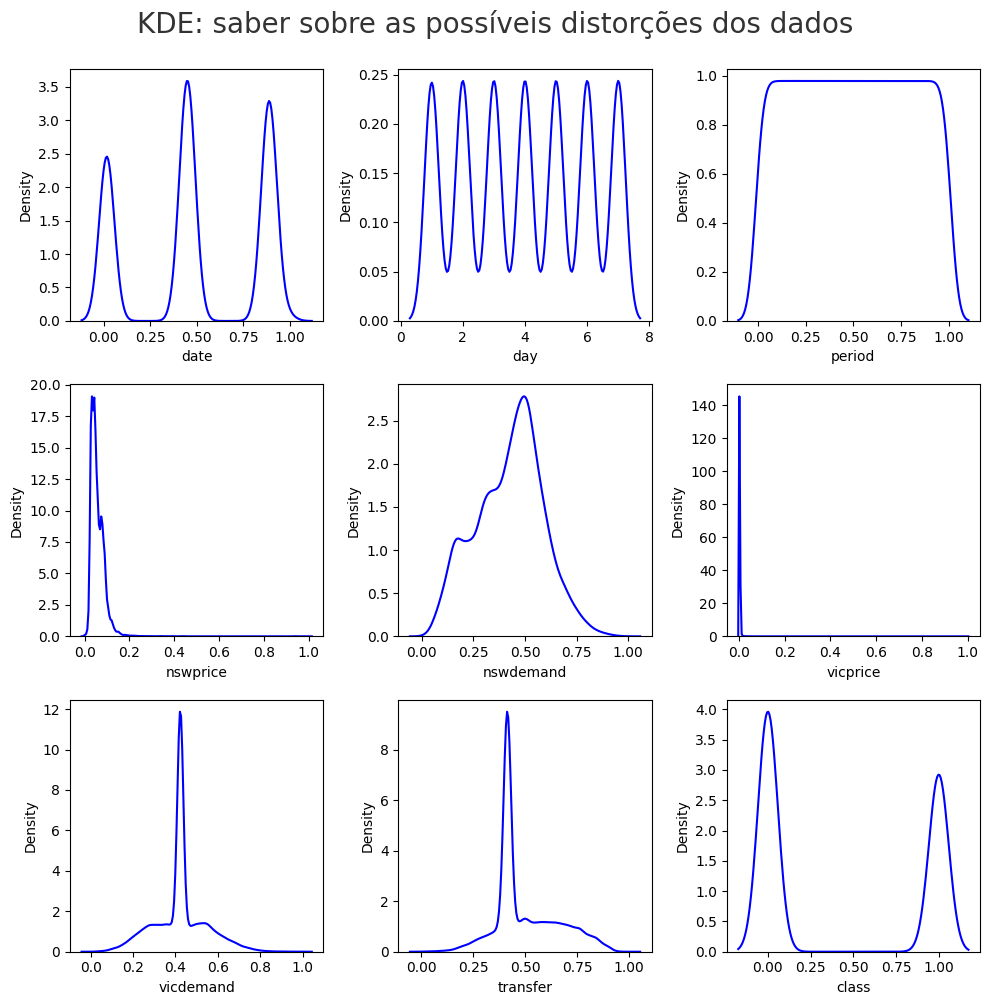

In [48]:
#baseado nesse artigo: https://medium.com/@renata-biaggi/guia-completo-an%C3%A1lise-explorat%C3%B3ria-de-dados-com-python-2964fa2940f4
num_colunas = len(read.columns)
num_linhas = (num_colunas + 2) // 3


plt.figure(figsize=(10,10))
plt.suptitle("KDE: saber sobre as possíveis distorções dos dados", fontsize=20, alpha=0.8, y=1)

for i in range(len(read)):
    plt.subplot(num_linhas,3,i+1)# Aqui é na sequência: 5 : quantid. de linhas, 3 : quantid. de colunas, i+1 : as posições do plot
 
    sn.kdeplot(x=read[read.columns[i]] ,color='blue')#o motivo de ser "x="" e não "data=" é por causa que vai se criar 
    plt.xlabel(read.columns[i])
    plt.tight_layout()
    #tinha um problema de ter um subplot extra no gráfico


In [ ]:
read.isna().sum()

date         0
day          0
period       0
nswprice     0
nswdemand    0
vicprice     0
vicdemand    0
transfer     0
class        0
dtype: int64

In [ ]:
uniquie_values =[]
for i in read.columns[0:9].tolist():
    print(i," : ", len(read[i].astype(str).value_counts()))
    uniquie_values.append(read[i].astype(str).value_counts())

date  :  933
day  :  7
period  :  48
nswprice  :  4089
nswdemand  :  5266
vicprice  :  3798
vicdemand  :  2846
transfer  :  1878
class  :  2


In [ ]:
read.describe()

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer
count,45312.000000,45312.000000,45312.000000,45312.000000,45312.000000,45312.000000,45312.000000,45312.000000
mean,0.499080,4.003178,0.500000,0.057868,0.425418,0.003467,0.422915,0.500526
std,0.340308,1.998695,0.294756,0.039991,0.163323,0.010213,0.120965,0.153373
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.031934,2.000000,0.250000,0.035127,0.309134,0.002277,0.372346,0.414912
50%,0.456329,4.000000,0.500000,0.048652,0.443693,0.003467,0.422915,0.414912
75%,0.880547,6.000000,0.750000,0.074336,0.536001,0.003467,0.469252,0.605702
max,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#read.duplicated().sum()
#read = read.drop(['class'], axis=1)# já que não dá para fazer muitos gráficos com essa informação

In [ ]:

#read_copy = cy.deepcopy(read)
#read_copy.corr()


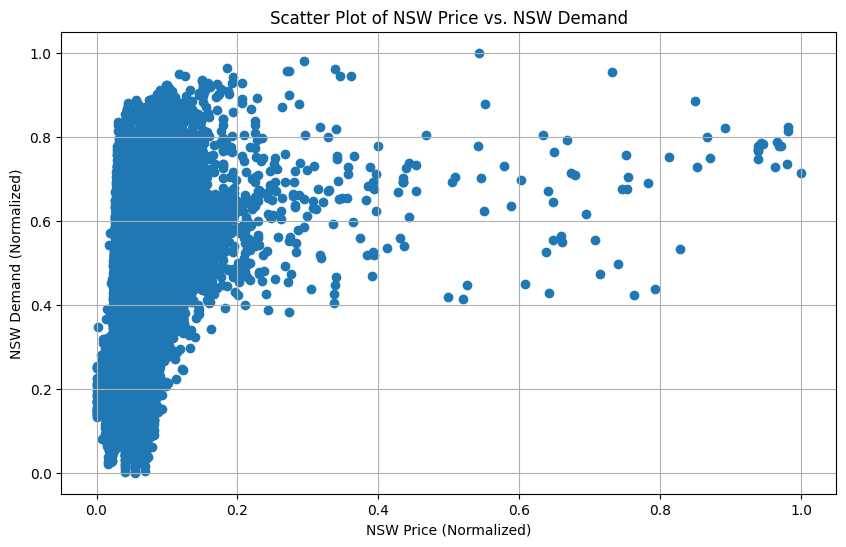

In [ ]:
#estudar mais como fazer esses gráficos nesse tipo de situação com dados normalizados

plt.figure(figsize=(10, 6))
plt.scatter(read['nswprice'], read['nswdemand'])
plt.xlabel('NSW Price (Normalized)')
plt.ylabel('NSW Demand (Normalized)')
plt.title('Scatter Plot of NSW Price vs. NSW Demand')
plt.grid(True)
plt.show()



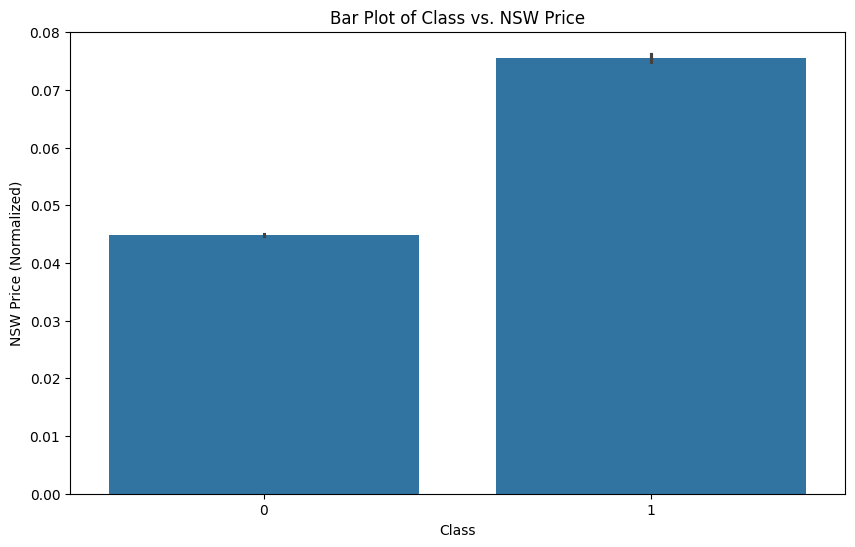

In [ ]:
#class: up = 1 e down = 0
plt.figure(figsize=(10, 6))
sn.barplot(x='class', y='nswprice', data=read)
plt.xlabel('Class')
plt.ylabel('NSW Price (Normalized)')
plt.title('Bar Plot of Class vs. NSW Price')
plt.show()


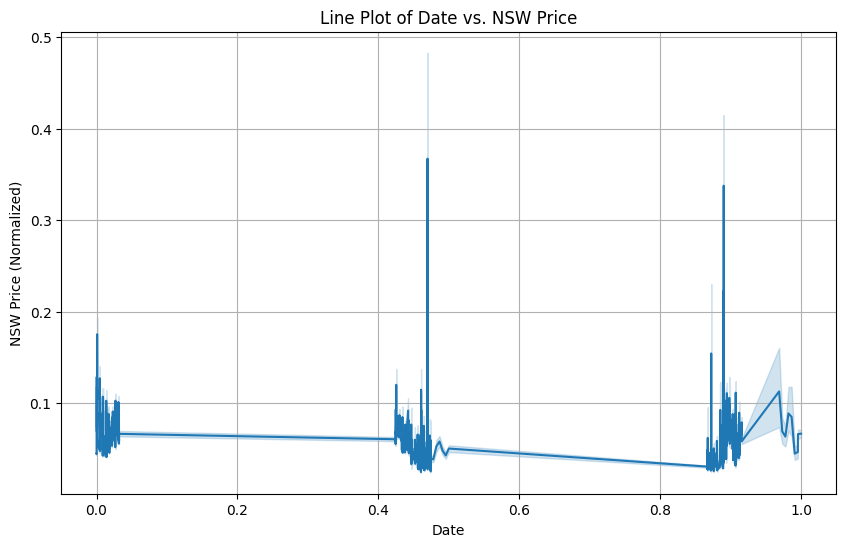

In [ ]:
#Date referente as datas dos anos 96 a 98
plt.figure(figsize=(10, 6))
sn.lineplot(x='date', y='nswprice', data=read)
plt.xlabel('Date')
plt.ylabel('NSW Price (Normalized)')
plt.title('Line Plot of Date vs. NSW Price')
plt.grid(True)
plt.show()

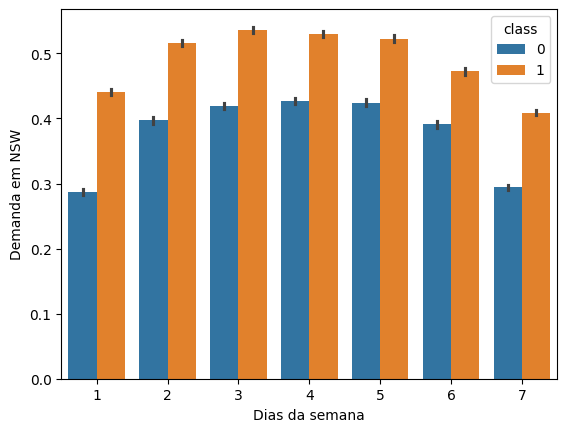

In [ ]:
sn.barplot(data=read, x='day', y='nswdemand', hue='class')

plt.xlabel('Dias da semana')
plt.ylabel('Demanda em NSW')

plt.show()

In [ ]:
#boxplot como fazer 

Machine Learning
